# Second-level signatures

In [1]:
import dask.dataframe
import pandas as pd
import numpy as np

from clustergram import Clustergram

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import urbangrammar_graphics as ugg
import dask_geopandas
from utils.dask_geopandas import dask_dissolve

In [2]:
standardized_form = dask.dataframe.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/form/standardized/").set_index('hindex')
stand_fn = dask.dataframe.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/function/standardized/")
data = dask.dataframe.multi.concat([standardized_form, stand_fn], axis=1).replace([np.inf, -np.inf], np.nan).fillna(0)
data = data.drop(columns=["keep_q1", "keep_q2", "keep_q3"])
%time data = data.compute()

CPU times: user 2min 41s, sys: 1min 29s, total: 4min 11s
Wall time: 2min 46s


In [3]:
labels = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/KMeans10GB.pq")

## Sub-cluster cluster 9 - city centres

In [4]:
data9 = data.loc[labels.kmeans10gb == 9]

In [5]:
cgram = Clustergram(range(1, 25), method='kmeans', n_init=1000, random_state=42)
cgram.fit(data9)

K=1 fitted in 138.56104564666748 seconds.
K=2 fitted in 250.19275641441345 seconds.
K=3 fitted in 496.8422074317932 seconds.
K=4 fitted in 516.2055711746216 seconds.
K=5 fitted in 524.4590675830841 seconds.
K=6 fitted in 557.9513728618622 seconds.
K=7 fitted in 614.9245867729187 seconds.
K=8 fitted in 675.608170747757 seconds.
K=9 fitted in 727.5412681102753 seconds.
K=10 fitted in 805.7417376041412 seconds.
K=11 fitted in 864.23623919487 seconds.
K=12 fitted in 940.5778124332428 seconds.
K=13 fitted in 1001.939873456955 seconds.
K=14 fitted in 1127.1891009807587 seconds.
K=15 fitted in 1266.9384486675262 seconds.
K=16 fitted in 1347.8543231487274 seconds.
K=17 fitted in 1421.443199634552 seconds.
K=18 fitted in 1487.2952530384064 seconds.
K=19 fitted in 1551.0777575969696 seconds.
K=20 fitted in 1595.5207443237305 seconds.
K=21 fitted in 1636.6767675876617 seconds.
K=22 fitted in 1664.2299811840057 seconds.
K=23 fitted in 1723.266358613968 seconds.
K=24 fitted in 1786.8603992462158 se

In [7]:
import urbangrammar_graphics as ugg
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

In [8]:
fig = cgram.bokeh(
    figsize=(800, 600),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
    size=.2
)
show(fig)

In [46]:
from bokeh.plotting import figure, output_file, save

output_file(filename="../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_cl9.html", title="clustergram_cl9")
save(fig)

'/home/jovyan/work/urbangrammar_samba/spatial_signatures/clustering_data/clustergram_cl9.html'

<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

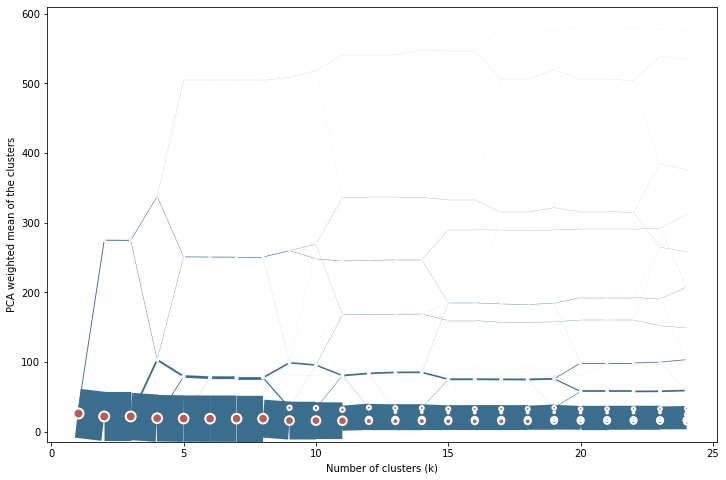

In [9]:
cgram.plot(
    figsize=(12, 8),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
    size=.2
)

<AxesSubplot:>

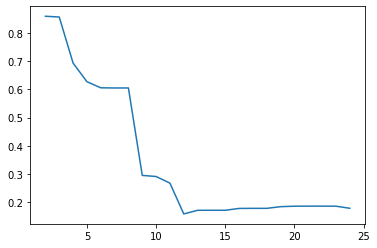

In [51]:
cgram.silhouette_score().plot()

<AxesSubplot:>

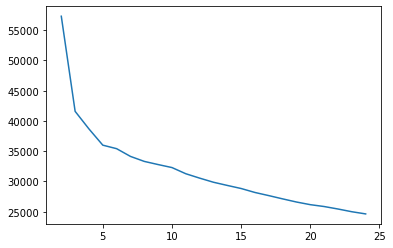

In [49]:
cgram.calinski_harabasz_score().plot()

<AxesSubplot:>

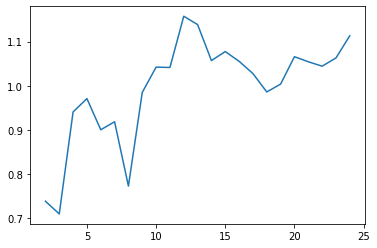

In [50]:
cgram.davies_bouldin_score().plot()

In [10]:
labels = cgram.labels.copy()
labels.columns = labels.columns.astype("str")  # parquet require str column names
labels.to_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_cl9_labels.pq")

In [29]:
labels = cgram.labels.copy()

In [31]:
labels.index = data9.index
labels

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
hindex,,,,,,,,,,,,,,,,,,,,,
c000e107423t0006,0,0,0,0,0,0,0,0,0,0,...,14,4,10,2,11,6,6,18,22,13
c000e107423t0007,0,0,0,0,0,0,0,0,0,0,...,14,4,10,2,11,6,6,18,22,13
c000e107423t0011,0,0,0,0,0,0,0,0,0,0,...,14,4,10,2,11,6,6,18,22,13
c000e107423t0012,0,0,0,0,0,0,0,0,0,0,...,14,4,10,2,11,6,6,18,22,13
c000e107423t0014,0,0,0,0,0,0,0,0,0,0,...,14,4,10,2,11,6,6,18,22,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c102e622606t0000,0,0,0,0,0,0,0,0,0,0,...,14,4,10,2,11,6,6,18,22,13
c102e622610t0001,0,0,0,0,0,0,0,0,0,0,...,14,4,10,2,11,6,6,18,22,13
c102e622621t0000,0,0,0,0,0,0,0,0,0,0,...,14,4,10,2,11,6,6,18,22,13


In [58]:
labels[9].value_counts()

0    86380
2    21760
4     3739
1     1390
5      264
7       98
8        8
3        3
6        2
Name: 9, dtype: int64

In [32]:
centres = []
for i in range(103):
    geom = gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/tessellation/tess_{i}.pq", columns=["tessellation", "hindex"]).set_index("hindex")
    geom = geom.merge(labels, how="left", left_index=True, right_index=True)
    geom = geom[~geom[2].isna()]
    centres.append(geom)
    print(f"Chunk {i} done.")

Chunk 0 done.
Chunk 1 done.
Chunk 2 done.
Chunk 3 done.
Chunk 4 done.
Chunk 5 done.
Chunk 6 done.
Chunk 7 done.
Chunk 8 done.
Chunk 9 done.
Chunk 10 done.
Chunk 11 done.
Chunk 12 done.
Chunk 13 done.
Chunk 14 done.
Chunk 15 done.
Chunk 16 done.
Chunk 17 done.
Chunk 18 done.
Chunk 19 done.
Chunk 20 done.
Chunk 21 done.
Chunk 22 done.
Chunk 23 done.
Chunk 24 done.
Chunk 25 done.
Chunk 26 done.
Chunk 27 done.
Chunk 28 done.
Chunk 29 done.
Chunk 30 done.
Chunk 31 done.
Chunk 32 done.
Chunk 33 done.
Chunk 34 done.
Chunk 35 done.
Chunk 36 done.
Chunk 37 done.
Chunk 38 done.
Chunk 39 done.
Chunk 40 done.
Chunk 41 done.
Chunk 42 done.
Chunk 43 done.
Chunk 44 done.
Chunk 45 done.
Chunk 46 done.
Chunk 47 done.
Chunk 48 done.
Chunk 49 done.
Chunk 50 done.
Chunk 51 done.
Chunk 52 done.
Chunk 53 done.
Chunk 54 done.
Chunk 55 done.
Chunk 56 done.
Chunk 57 done.
Chunk 58 done.
Chunk 59 done.
Chunk 60 done.
Chunk 61 done.
Chunk 62 done.
Chunk 63 done.
Chunk 64 done.
Chunk 65 done.
Chunk 66 done.
Chunk

In [33]:
centres = pd.concat(centres)
ddf = dask_geopandas.from_geopandas(centres.reset_index().rename_geometry("geometry"), npartitions=64)
ddf.geometry = ddf.simplify(2).buffer(.001).simplify(2)
%time spsig = ddf.compute()

CPU times: user 28 s, sys: 0 ns, total: 28 s
Wall time: 1.97 s


In [36]:
spsig.columns = spsig.columns.astype("str")  # parquet require str column names

In [40]:
spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster9_all_GB_simplified.pq")

### Dissolve signatures

In [60]:
cl_labels = labels[9]

In [62]:
cl_labels.name = 'subclustering_cluster9_k9'

In [64]:
cl_labels = pd.DataFrame(cl_labels)

In [65]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import urbangrammar_graphics as ugg
import dask_geopandas
from utils.dask_geopandas import dask_dissolve
import warnings 

warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')

In [67]:
centres

,tessellation,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
hindex,,,,,,,,,,,,,,,,,,,,,
c000e108672t0004,"POLYGON ((353974.785 429026.424, 353976.600 42...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,4.0,10.0,2.0,11.0,6.0,6.0,18.0,22.0,13.0
c000e108672t0001,"POLYGON ((354010.365 429050.372, 354009.350 42...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,4.0,10.0,2.0,11.0,6.0,6.0,18.0,22.0,13.0
c000e108639t0012,"POLYGON ((353959.502 429043.658, 353955.858 42...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,4.0,10.0,2.0,11.0,6.0,6.0,18.0,22.0,13.0
c000e108639t0001,"POLYGON ((353977.093 429056.686, 353975.961 42...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,4.0,10.0,2.0,11.0,6.0,6.0,18.0,22.0,13.0
c000e108639t0002,"POLYGON ((353956.738 429081.451, 353954.996 42...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,4.0,10.0,2.0,11.0,6.0,6.0,18.0,22.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c102e176044t0000,"POLYGON ((389299.110 390268.240, 389296.750 39...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,4.0,10.0,2.0,11.0,6.0,6.0,18.0,22.0,13.0
c102e176046t0000,"POLYGON ((389324.250 390317.000, 389329.880 39...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,4.0,10.0,2.0,11.0,6.0,6.0,18.0,22.0,13.0
c102e176047t0000,"POLYGON ((389335.500 390318.500, 389335.260 39...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,4.0,10.0,2.0,11.0,6.0,6.0,18.0,22.0,13.0


In [71]:
centres = centres.sort_values(9).rename_geometry("geometry")[[9, "geometry"]]

In [73]:
centres.columns = ["clusters", "geometry"]

In [74]:
ddf = dask_geopandas.from_geopandas(centres, npartitions=64)
spsig = dask_dissolve(ddf, by="clusters").compute().reset_index(drop=True).explode()

In [75]:
spsig

clusters                                           geometry
0 0       0.0  POLYGON Z ((90227.273 17620.071 0.000, 90187.3...
  1       0.0  POLYGON Z ((151996.490 40926.350 0.000, 151998...
  2       0.0  POLYGON Z ((180573.320 62127.626 0.000, 180573...
  3       0.0  POLYGON Z ((180593.580 61881.970 0.000, 180582...
  4       0.0  POLYGON Z ((180757.583 61748.508 0.000, 180759...
..        ...                                                ...
8 3       8.0  POLYGON ((323321.005 463795.416, 323319.842 46...
  4       8.0  POLYGON ((325929.840 1008792.061, 325927.377 1...
  5       8.0  POLYGON ((337804.770 1013422.583, 337800.122 1...
  6       8.0  POLYGON ((422304.270 1147826.990, 422296.000 1...
  7       8.0  POLYGON ((525396.260 439215.480, 525360.920 43...

[2081 rows x 2 columns]

In [76]:
spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster9_k9_GB.pq")

In [77]:
spsig.geometry = spsig.simplify(2).buffer(.001).simplify(2)

In [78]:
spsig.to_file(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster9_k9_GB_simplified.geojson", driver="GeoJSON")
spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster9_k9_GB_GB_simplified.pq")

## Sub-cluster cluster 2 - neighbourhoods

In [12]:
labels = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/KMeans10GB.pq")
data2 = data.loc[labels.kmeans10gb == 2]

In [19]:
cgram2 = Clustergram(range(1, 25), method='kmeans', n_init=100, random_state=42)
cgram2.fit(data2)

K=1 fitted in 74.71555924415588 seconds.
K=2 fitted in 214.04965329170227 seconds.
K=3 fitted in 448.26729440689087 seconds.
K=4 fitted in 566.3618776798248 seconds.
K=5 fitted in 620.1726832389832 seconds.
K=6 fitted in 743.0392332077026 seconds.
K=7 fitted in 914.3954825401306 seconds.
K=8 fitted in 1232.1980152130127 seconds.
K=9 fitted in 1477.7050552368164 seconds.
K=10 fitted in 1512.5710220336914 seconds.
K=11 fitted in 1557.0559606552124 seconds.
K=12 fitted in 1562.9378054141998 seconds.
K=13 fitted in 1698.0964839458466 seconds.
K=14 fitted in 1756.1707797050476 seconds.
K=15 fitted in 1831.6864550113678 seconds.
K=16 fitted in 2088.715784549713 seconds.
K=17 fitted in 2229.236268043518 seconds.
K=18 fitted in 2437.7369673252106 seconds.
K=19 fitted in 2663.076995372772 seconds.
K=20 fitted in 2612.7708687782288 seconds.
K=21 fitted in 2755.6792554855347 seconds.
K=22 fitted in 2960.3728127479553 seconds.
K=23 fitted in 3114.0820450782776 seconds.
K=24 fitted in 3199.21404886

In [23]:
show(cgram2.bokeh(
    figsize=(800, 600),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
))

<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

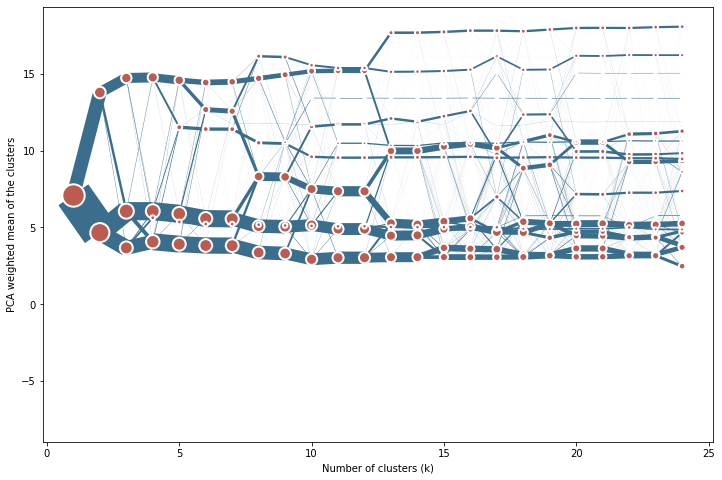

In [47]:
cgram2.plot(
    figsize=(12, 8),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
)

In [50]:
labels = cgram2.labels.copy()
labels.columns = labels.columns.astype("str")  # parquet require str column names
labels.to_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_cl2_labels.pq")

In [25]:
geom51 = gpd.read_parquet("../../urbangrammar_samba/spatial_signatures/tessellation/tess_51.pq", columns=["tessellation", "hindex"])
geom68 = gpd.read_parquet("../../urbangrammar_samba/spatial_signatures/tessellation/tess_68.pq", columns=["tessellation", "hindex"])

In [28]:
labels = cgram2.labels.copy()
labels.index = data2.index

In [31]:
geom51 = geom51.set_index("hindex")
geom51["cluster"] = labels[3].loc[labels.index.str.startswith("c051")]

In [32]:
geom68 = geom68.set_index("hindex")
geom68["cluster"] = labels[3].loc[labels.index.str.startswith("c068")]

In [36]:
geom51 = geom51[~geom51.cluster.isna()]
geom68 = geom68[~geom68.cluster.isna()]

In [38]:
cmap = ugg.get_colormap(3, randomize=True)

for i, geom in enumerate([geom51, geom68]):
    ddf = dask_geopandas.from_geopandas(geom.sort_values('cluster'), npartitions=64)
    spsig = dask_dissolve(ddf, by='cluster').compute().reset_index(drop=True).explode()
    
    token = "pk.eyJ1IjoibWFydGluZmxlaXMiLCJhIjoiY2tsNmhlemtxMmlicTJubXN6and5aTc2NCJ9.l7nSUXM7ZRjAWTB7oXiswQ"

    ax = spsig.plot("cluster", figsize=(20, 20), zorder=1, linewidth=.3, edgecolor='w', alpha=1, legend=True, cmap=cmap, categorical=True)
    ctx.add_basemap(ax, crs=27700, source=ugg.get_tiles('roads', token), zorder=2, alpha=.3)
    ctx.add_basemap(ax, crs=27700, source=ugg.get_tiles('labels', token), zorder=3, alpha=1)
    ctx.add_basemap(ax, crs=27700, source=ugg.get_tiles('background', token), zorder=-1, alpha=1)
    ax.set_axis_off()

    plt.savefig(f"../../urbangrammar_samba/spatial_signatures/clustering_data/validation/maps/sub_cl2_3_{i}.png")
    plt.close()   

In [39]:
geom15 = gpd.read_parquet("../../urbangrammar_samba/spatial_signatures/tessellation/tess_15.pq", columns=["tessellation", "hindex"])
geom15 = geom15.set_index("hindex")
geom15["cluster"] = labels[3].loc[labels.index.str.startswith("c015")]
geom = geom15[~geom15.cluster.isna()]

ddf = dask_geopandas.from_geopandas(geom.sort_values('cluster'), npartitions=64)
spsig = dask_dissolve(ddf, by='cluster').compute().reset_index(drop=True).explode()

ax = spsig.plot("cluster", figsize=(20, 20), zorder=1, linewidth=.3, edgecolor='w', alpha=1, legend=True, cmap=cmap, categorical=True)
ctx.add_basemap(ax, crs=27700, source=ugg.get_tiles('roads', token), zorder=2, alpha=.3)
ctx.add_basemap(ax, crs=27700, source=ugg.get_tiles('labels', token), zorder=3, alpha=1)
ctx.add_basemap(ax, crs=27700, source=ugg.get_tiles('background', token), zorder=-1, alpha=1)
ax.set_axis_off()

plt.savefig(f"../../urbangrammar_samba/spatial_signatures/clustering_data/validation/maps/sub_cl2_3_london.png")
plt.close()   

## Subclustering cluster 2

In [13]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3, random_state=42, n_init=1000, verbose=1)
%time km.fit(data2)

Initialization complete
Iteration 0, inertia 233713524.89887017
Iteration 1, inertia 167985849.8511986
Iteration 2, inertia 165239464.57162914
Iteration 3, inertia 164678051.8222587
Iteration 4, inertia 164532730.44655812
Iteration 5, inertia 164464242.166739
Iteration 6, inertia 164420178.3424556
Iteration 7, inertia 164388999.7659917
Iteration 8, inertia 164366101.97177017
Iteration 9, inertia 164348683.29441345
Iteration 10, inertia 164335640.08455142
Iteration 11, inertia 164325750.4356032
Iteration 12, inertia 164318502.2304115
Iteration 13, inertia 164313302.12515086
Iteration 14, inertia 164309229.93717128
Iteration 15, inertia 164306172.8763578
Iteration 16, inertia 164304088.80519342
Iteration 17, inertia 164302490.0493883
Iteration 18, inertia 164301345.21176973
Iteration 19, inertia 164300430.64724597
Iteration 20, inertia 164299635.62014082
Iteration 21, inertia 164298864.5946327
Iteration 22, inertia 164298151.9265454
Iteration 23, inertia 164297399.79023874
Iteration 24, 

In [ ]:
import pandas as pd
labels = pd.Series(km.labels_, index=data2.index, name="subclustering_cluster2_k3")

In [ ]:
pd.DataFrame(labels).to_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/subclustering_cluster2_k3.pq")

In [18]:
labels = pd.DataFrame(labels)

In [19]:
labels

,subclustering_cluster2_k3
hindex,
c000e097919t0003,1
c000e097919t0005,1
c000e097919t0008,1
c000e097919t0009,1
c000e097919t0015,1
...,...
c102e639766t0007,0
c102e639766t0010,0
c102e639766t0011,0


In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import urbangrammar_graphics as ugg
import dask_geopandas
from utils.dask_geopandas import dask_dissolve
import warnings 

warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')

In [22]:
for i in range(103):
    geom = gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/tessellation/tess_{i}.pq", columns=["tessellation", "hindex"]).set_index("hindex")
    geom = geom.merge(labels, how="left", left_index=True, right_index=True)
    geom = geom[~geom.subclustering_cluster2_k3.isna()]


    ddf = dask_geopandas.from_geopandas(geom.sort_values('subclustering_cluster2_k3'), npartitions=64)
    spsig = dask_dissolve(ddf, by='subclustering_cluster2_k3').compute().reset_index(drop=True).explode()

    spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/temp/spsig_{i}.pq")
    print(f"Chunk {i} done.")

Chunk 0 done.
Chunk 1 done.
Chunk 2 done.
Chunk 3 done.
Chunk 4 done.
Chunk 5 done.
Chunk 6 done.
Chunk 7 done.
Chunk 8 done.
Chunk 9 done.
Chunk 10 done.
Chunk 11 done.
Chunk 12 done.
Chunk 13 done.
Chunk 14 done.
Chunk 15 done.
Chunk 16 done.
Chunk 17 done.
Chunk 18 done.
Chunk 19 done.
Chunk 20 done.
Chunk 21 done.
Chunk 22 done.
Chunk 23 done.
Chunk 24 done.
Chunk 25 done.
Chunk 26 done.
Chunk 27 done.
Chunk 28 done.
Chunk 29 done.
Chunk 30 done.
Chunk 31 done.
Chunk 32 done.
Chunk 33 done.
Chunk 34 done.
Chunk 35 done.
Chunk 36 done.
Chunk 37 done.
Chunk 38 done.
Chunk 39 done.
Chunk 40 done.
Chunk 41 done.
Chunk 42 done.
Chunk 43 done.
Chunk 44 done.
Chunk 45 done.
Chunk 46 done.
Chunk 47 done.
Chunk 48 done.
Chunk 49 done.
Chunk 50 done.
Chunk 51 done.
Chunk 52 done.
Chunk 53 done.
Chunk 54 done.
Chunk 55 done.
Chunk 56 done.
Chunk 57 done.
Chunk 58 done.
Chunk 59 done.
Chunk 60 done.
Chunk 61 done.
Chunk 62 done.
Chunk 63 done.
Chunk 64 done.
Chunk 65 done.
Chunk 66 done.
Chunk

In [23]:
spsigs = pd.concat([gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/temp/spsig_{i}.pq") for i in range(103)])
ddf = dask_geopandas.from_geopandas(spsigs.sort_values('subclustering_cluster2_k3').reset_index(drop=True), npartitions=64)
spsig = dask_dissolve(ddf, by='subclustering_cluster2_k3').compute().reset_index(drop=True).explode()

spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster2_k3_GB.pq")

In [24]:
ddf = dask_geopandas.from_geopandas(spsig.reset_index().rename_geometry("geometry"), npartitions=64)
ddf.geometry = ddf.simplify(2).buffer(.001).simplify(2)
%time spsig = ddf.compute()

CPU times: user 36 s, sys: 352 ms, total: 36.4 s
Wall time: 5.01 s


In [25]:
spsig.to_file(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster2_k3_GB_simplified.geojson", driver="GeoJSON")

In [27]:
spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster2_k3_GB_simplified.pq")

In [11]:
import pandas as pd

In [2]:
import geopandas as gpd

spsig = gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/signatures_KMeans10_GB.pq")

In [3]:
level2_2 = gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster2_k3_GB.pq")
level2_9 = gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/sub_signatures_cluster9_k9_GB.pq")

In [5]:
level1 = spsig[~spsig.kmeans10gb.isin([2, 9])]

In [8]:
level2_2["kmeans10gb"] = 2
level2_9["kmeans10gb"] = 9

In [7]:
level1

kmeans10gb                                       tessellation
0 0              0  POLYGON Z ((62220.000 798500.000 0.000, 62110....
  1              0  POLYGON Z ((63507.682 796515.169 0.000, 63471....
  2              0  POLYGON Z ((65953.174 802246.172 0.000, 65950....
  3              0  POLYGON Z ((67297.740 803435.800 0.000, 67220....
  4              0  POLYGON Z ((75760.000 852670.000 0.000, 75700....
...            ...                                                ...
8 9413           8  POLYGON Z ((653930.897 294786.267 0.000, 65392...
  9414           8  POLYGON Z ((654082.364 294855.835 0.000, 65408...
  9415           8  POLYGON Z ((654128.163 294913.000 0.000, 65412...
  9416           8  POLYGON Z ((654804.134 295390.027 0.000, 65480...
  9417           8  POLYGON Z ((654843.564 295453.013 0.000, 65484...

[78662 rows x 2 columns]

In [12]:
level2_2.columns, level2_9.columns

(Index(['subclustering_cluster2_k3', 'tessellation', 'kmeans10gb'], dtype='object'),
 Index(['clusters', 'geometry', 'kmeans10gb'], dtype='object'))

In [14]:
level2_2.columns = ['level2', 'tessellation', 'kmeans10gb']
level2_9.columns = ['level2', 'geometry', 'kmeans10gb']
level2_2 = level2_2.rename_geometry("geometry")
level1 = level1.rename_geometry("geometry")
level1['level2'] = 0

In [15]:
combined = pd.concat([level1, level2_2, level2_9], axis=0)

In [17]:
combined = combined.reset_index(drop=True)

In [20]:
combined["signature_type"] = combined.kmeans10gb.astype(str) + '_' + combined.level2.astype(int).astype(str)

In [23]:
combined.signature_type.nunique()

20

In [24]:
combined.to_parquet("../../urbangrammar_samba/spatial_signatures/signatures/signatures_combined_levels_orig.pq")

<ipython-input-24-b39b5e626a13>:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  combined.to_parquet("../../urbangrammar_samba/spatial_signatures/signatures/signatures_combined_levels_orig.pq")


In [25]:
combined

,kmeans10gb,geometry,level2,signature_type
0,0,"POLYGON Z ((62220.000 798500.000 0.000, 62110....",0.0,0_0
1,0,"POLYGON Z ((63507.682 796515.169 0.000, 63471....",0.0,0_0
2,0,"POLYGON Z ((65953.174 802246.172 0.000, 65950....",0.0,0_0
3,0,"POLYGON Z ((67297.740 803435.800 0.000, 67220....",0.0,0_0
4,0,"POLYGON Z ((75760.000 852670.000 0.000, 75700....",0.0,0_0
...,...,...,...,...
96699,9,"POLYGON ((323321.005 463795.416, 323319.842 46...",8.0,9_8
96700,9,"POLYGON ((325929.840 1008792.061, 325927.377 1...",8.0,9_8
96701,9,"POLYGON ((337804.770 1013422.583, 337800.122 1...",8.0,9_8
96702,9,"POLYGON ((422304.270 1147826.990, 422296.000 1...",8.0,9_8


In [26]:
import dask_geopandas

ddf = dask_geopandas.from_geopandas(combined, npartitions=512)
ddf.geometry = ddf.simplify(2).buffer(.001).simplify(2)
%time simplified = ddf.compute()

/opt/conda/lib/python3.8/site-packages/dask_geopandas/backends.py:31: FutureWarning: The input object of type 'LineString' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'LineString', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  a = np.array(
/opt/conda/lib/python3.8/site-packages/dask_geopandas/backends.py:31: FutureWarning: The input object of type 'LineString' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'LineString', or

CPU times: user 19min 29s, sys: 2min 4s, total: 21min 33s
Wall time: 12min 38s


In [27]:
simplified.to_parquet("../../urbangrammar_samba/spatial_signatures/signatures/signatures_combined_levels_simplified.pq")

<ipython-input-27-f56ab07fecb2>:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  simplified.to_parquet("../../urbangrammar_samba/spatial_signatures/signatures/signatures_combined_levels_simplified.pq")
